# 1. KNN

## 1.1 Sklearn KNN

### 1.1.1 Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

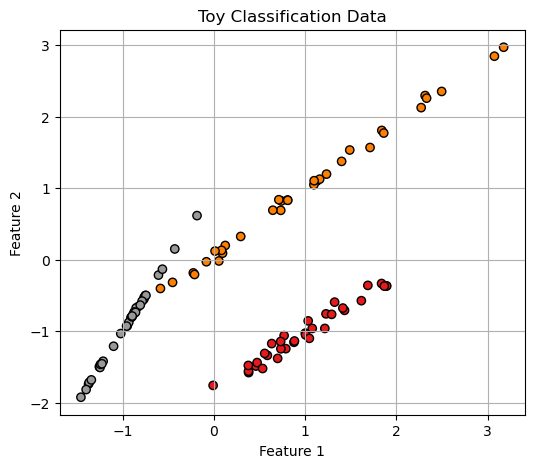

In [3]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k')
plt.title("Toy Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

### 1.1.2 Skealrn KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

### 1.1.3 Visualize the boundary

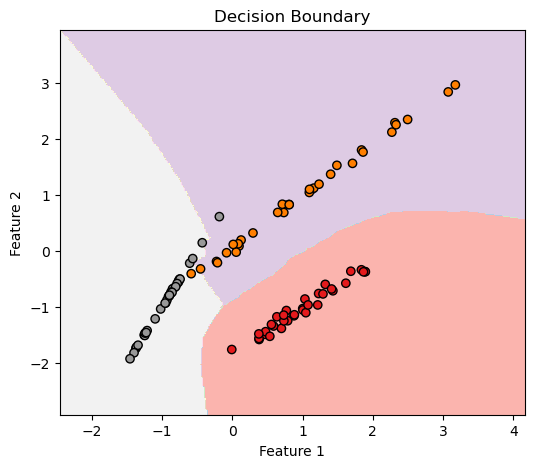

In [6]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap='Pastel1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(knn, X, y)

## 1.2 Numpy KNN

In [7]:
import numpy as np
from collections import Counter

KNN is a lazy learning process, no model training during fit(), just remember the data. Then during the prediction, do the calculation!

In [24]:
class KNNClassifier:
    def __init__(self, k = 3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            #calculate the distance Euclidean distance of test example x to all training data points
            #X_train: (m, n), X_test: (t, n), y_train: (m,), y_test: (t,),  x: (n,), distances: (m, )
            distances = np.linalg.norm(self.X_train - x, axis=1) #if ord=1 is mahanttan distance

            #pick neareast k labels
            k_indices = np.argsort(distances)[:self.k]

            #pick the labels of the neareast neighbors
            k_labels = self.y_train[k_indices]

            majority_vote = Counter(k_labels).most_common(1)[0][0]
            predictions.append(majority_vote)
        print(np.array(predictions))
        return np.array(predictions)
            

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
myKNN = KNNClassifier()
myKNN.fit(X_train, y_train)
y_pred = myKNN.predict(X_test)

[2 0 1 2 1 1 0 1 0 0 1 0 0 1 2 2 0 1 0 2 0 2 2 1 0 0 1 1 1 2]


In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print(f"acc: {acc}")

acc: 0.9666666666666667


[2 2 2 ... 1 1 1]


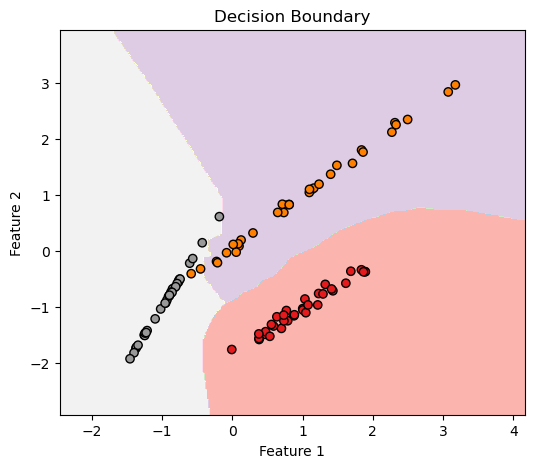

In [28]:
plot_decision_boundary(myKNN, X, y)

### 1.2.1 Vectorized predict()

for test use, I do not write it in class

In [29]:
def predict(X_train, y_train, X_test, k=3):
    X_test_square = np.sum(X_test ** 2, axis=1).reshape(-1, 1)  #size(t, 1) or can use keepdims=True, no need reshape
    X_train_square = np.sum(X_train ** 2, axis=1).reshape(1,-1) #size (1,m)
    cross_term = X_test @ X_train.T #shape(t, m)

    #get the distance
    dists = np.sqrt(X_test_square + X_train_square - 2 * cross_term) #shape(t, m)

    #the dists is (t,m) kind of stack t test points, every result is (m,)
    #equal to:
    #for x in X_test:
     #       distances = np.linalg.norm(X_train - x, axis=1) #if ord=1 is mahanttan distance (m,)
      #      print(distances)

    knn_indices = np.argsort(dists, axis=1)[:, :k]

    knn_labels = y_train[knn_indices]
    predictions = [Counter(row).most_common(1)[0][0] for row in knn_labels]
    return np.array(predictions)

In [30]:
predict(X_train, y_train, X_test)

array([2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2,
       2, 1, 0, 0, 1, 1, 1, 2])

# 2. KMeans

## 2.1 KMeans sklearn

### 2.1.1 Make the data

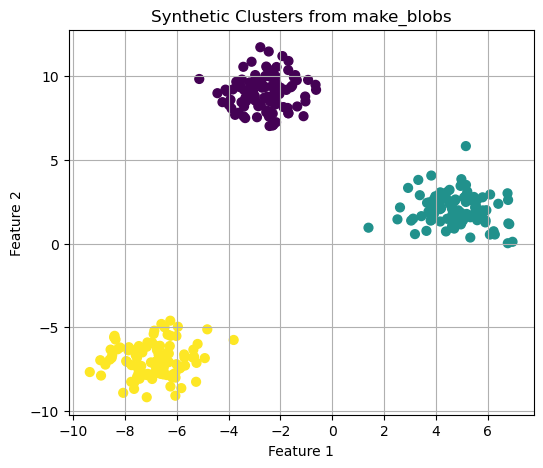

In [32]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=40)
plt.title("Synthetic Clusters from make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

### 2.1.2 skearn fit

In [33]:
from sklearn.cluster import KMeans

In [34]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

### 2.1.3 predict

In [37]:
labels= kmeans.labels_
centroids = kmeans.cluster_centers_

### 2.1.4 Visualize the results

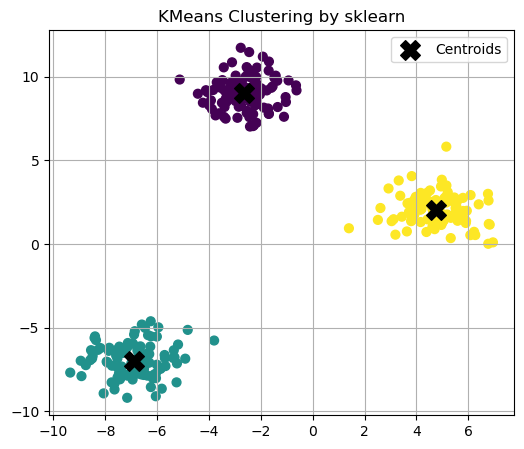

In [38]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("KMeans Clustering by sklearn")
plt.legend()
plt.grid(True)
plt.show()

Silhouette Score: 0.8480
SSE (手动计算): 566.86
SSE (sklearn inertia_): 566.86


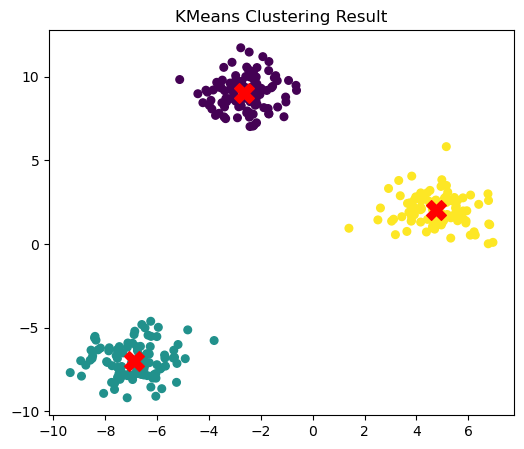

In [50]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: 生成合成数据
X, y_true = make_blobs(n_samples=300, centers=3, random_state=42)

# Step 2: sklearn KMeans 聚类
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Step 3: Silhouette Score 评估聚类效果
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Step 4: Sum of Squared Errors (SSE) 计算方法（和 inertia_ 一致）
sse = 0
for i in range(len(X)):
    center = centroids[labels[i]]
    sse += np.sum((X[i] - center) ** 2)
    
print(f"SSE (手动计算): {sse:.2f}")
print(f"SSE (sklearn inertia_): {kmeans.inertia_:.2f}")  # inertia_ 就是 SSE

# Step 5: 可视化聚类结果
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title("KMeans Clustering Result")
plt.show()

## 2.2 Numpy KMeans

In [51]:
k = 3
max_iters = 100
tol = 1e-4

### 2.2.1 Random initialize the initial centroids

In [52]:
rng = np.random.RandomState(42)
init_indices = rng.choice(len(X), size=k, replace=False)
centroids = X[init_indices] #shape (k,2)

### 2.2.2 Iterate

In [53]:
for _ in range(max_iters):
    #calculate every sample to cluster centroids distance
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2) #X[:, np.newaxis] is add new axis after first dimension
    #similarly X[:,:,np.newaxis] is add after second dimension and X[np.newaxis] is add before first dimension
    # X[:, np.newaxis] shape (m,1,2)
    # centroids shape (t,2)
    # subtraction will broadcast to (m,t,2)
    # then norm will do to axis=2, get (m,t) shape, distances[i,j] is i example in X to j points in centroids
    labels = np.argmin(distances, axis=1)
    # so labels is for each instance in X, they will have a label, labels shape (m,)

    #calculate the new centroids
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    #X[labels==j] choose that points labeled as j (closest to j-th centroids), then get mean along axis=0

    # check if converge
    if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
        break

    centroids = new_centroids

### 2.2.3 Visualize

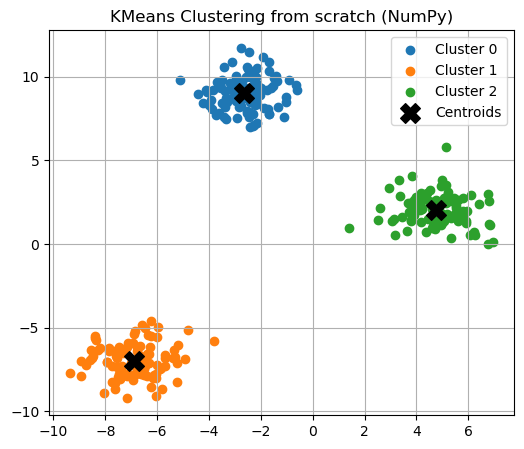

In [48]:
plt.figure(figsize=(6, 5))
for j in range(k):
    plt.scatter(X[labels == j, 0], X[labels == j, 1], label=f"Cluster {j}")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("KMeans Clustering from scratch (NumPy)")
plt.legend()
plt.grid(True)
plt.show()

### 2.2.4 class

In [60]:
class KMeansManual:
    def __init__(self, k=3, max_iter=100, tol=1e-4, random_state=42):
        self.n_clusters = k
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None

    def fit(self, X):
        n_samples, n_features = X.shape

        rng = np.random.RandomState(self.random_state)
        init_indices = rng.choice(len(X), size=self.n_clusters, replace=False)
        self.centroids = X[init_indices] #shape (k,2)   

        for _ in range(self.max_iter):
            #calculate every sample to cluster centroids distance
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2) #X[:, np.newaxis] is add new axis after first dimension
            #similarly X[:,:,np.newaxis] is add after second dimension and X[np.newaxis] is add before first dimension
            # X[:, np.newaxis] shape (m,1,2)
            # centroids shape (t,2)
            # subtraction will broadcast to (m,t,2)
            # then norm will do to axis=2, get (m,t) shape, distances[i,j] is i example in X to j points in centroids
            labels = np.argmin(distances, axis=1)
            # so labels is for each instance in X, they will have a label, labels shape (m,)
        
            #calculate the new centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            #X[labels==j] choose that points labeled as j (closest to j-th centroids), then get mean along axis=0
        
            # check if converge
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
        
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def score(self, X):
        sse = 0
        for i in range(len(X)):
            center = self.centroids[self.labels_[i]]
            sse += np.sum((X[i] - center) ** 2)
        return sse

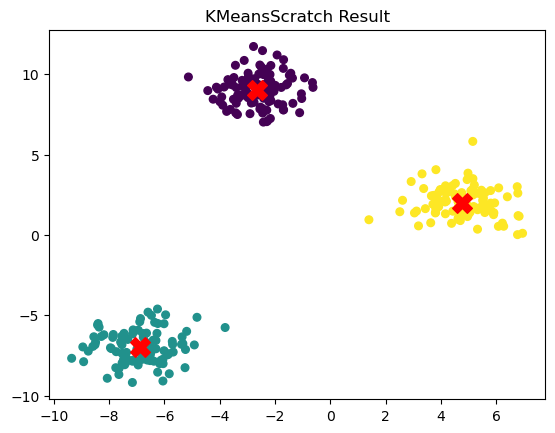

In [61]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成数据
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# 使用手写KMeans
kmeans = KMeansManual(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='X')
plt.title("KMeansScratch Result")
plt.show()

In [62]:
kmeans.score(X)

566.859551124413

In [63]:
labels

array([1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1])